# Contour Plots, 3D Plots, Optimisation

We will study contour plots and 3D plots for functions of two variables. We will also look at simple examples of unconstrained and constrained optimisation of functions of two variables.

Link: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

## Import

The imports here more than what we have seen so far.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Contour Plots, 3D Plots, Optimisation

We will look at plotting contours of surfaces, surface plots and optimising functions of two variables.

## Contour

Draw contours of the function:

$$
f(x, y) = x^2 + y^2
$$

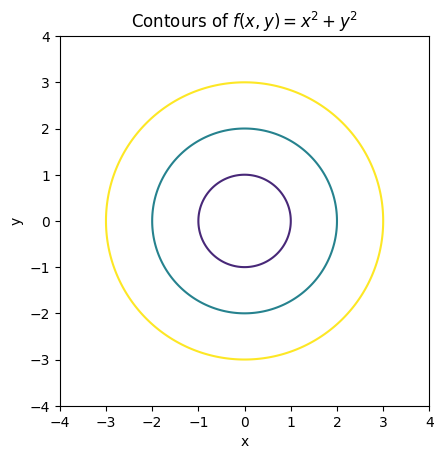

In [2]:
# Generate a grid of x and y values
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = X**2 + Y**2

# Plot the contours
plt.contour(X, Y, Z, levels=[0, 1, 4, 9])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contours of $f(x, y) = x^2 + y^2$')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 3D surface plot

Plot the following surface:

$$
f(x, y) = \exp \left[ \cfrac{-(x + 2)^2 - (y - 1)^2}{6} \right]
$$

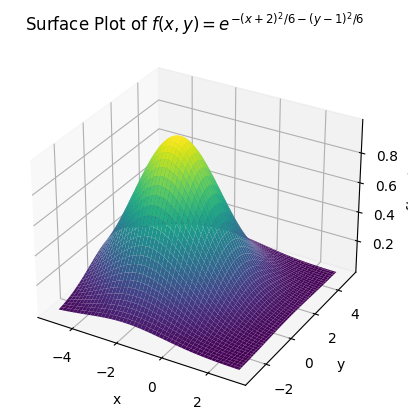

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y)
def f(x, y):
    return np.exp(-(x + 2)**2 / 6 - (y - 1)**2 / 6)

# Create a grid of x and y values
x = np.linspace(-5, 3, 100)
y = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values for the grid
Z = f(X, Y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Surface Plot of $f(x, y) = e^{-(x + 2)^2/6 - (y - 1)^2/6}$')

plt.show()

## Unconstrained Optimisation

Let us now try to find the maximum value of the above function. This is a simple, unconstrained optimisation problem. We will use `SciPy`'s optimisation routine for this.

$$
\max \limits_{x, y} \quad  \exp \left[ \cfrac{-(x + 2)^2 - (y - 1)^2}{6} \right]
$$

In [4]:
from scipy.optimize import minimize

# Define the negative of the function f(x, y)
def neg_f(xy):
    x, y = xy
    return -np.exp(-(x + 2)**2 / 6 - (y - 1)**2 / 6)

# Initial guess
initial_guess = [0, 0]

# Use the minimize function to find the maximum
result = minimize(neg_f, initial_guess, method='Nelder-Mead')

# Extract the maximum value and corresponding (x, y) coordinates
max_value = -result.fun
max_x, max_y = result.x

print(f"Maximum value: {max_value}")
print(f"Location of the maximum: (x = {max_x}, y = {max_y})")

Maximum value: 0.9999999995535142
Location of the maximum: (x = -1.999953801107818, y = 1.0000233361840203)


## Constraind Optimisation

Let us move to the slightly more complex setup of a constraind optimisation problem.

$$
\max \limits_{x, y} \quad 1 - x^2 - y^2
$$

subject to:

$$
x + y \geq 1
$$

In [5]:
from scipy.optimize import minimize

# Define the objective function to maximize (negative of it)
def objective(xy):
    x, y = xy
    return -(1 - x**2 - y**2)

# Define the constraint function
def constraint(xy):
    x, y = xy
    return x + y - 1

# Initial guess
initial_guess = [0, 0]

# Define the constraint as a dictionary
constraint_dict = {'type': 'ineq', 'fun': constraint}

# Set bounds for x and y
bounds = ((-np.inf, np.inf), (-np.inf, np.inf))

# Use the minimize function to solve the constrained optimization problem
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraint_dict)

# Extract the maximum value and corresponding (x, y) coordinates
max_value = -result.fun
max_x, max_y = result.x

print(f"Maximum value: {max_value}")
print(f"Location of the maximum: (x = {max_x}, y = {max_y})")

Maximum value: 0.4999999999999998
Location of the maximum: (x = 0.5, y = 0.5000000000000002)


### Verify

Plot the contours of the objective function along with the constraints. Verify the correctness of the solution obtaind.

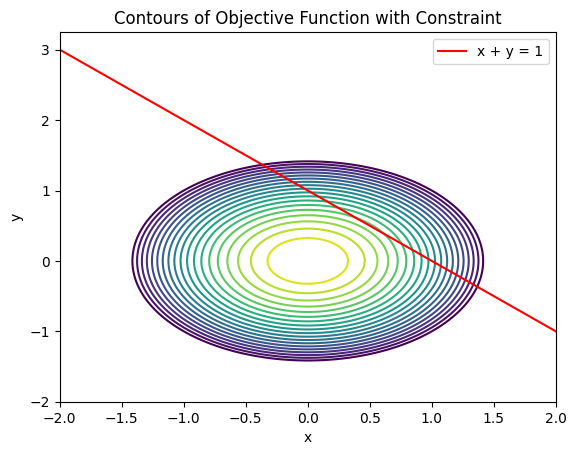

In [6]:
# Define the objective function
def objective(x, y):
    return 1 - x**2 - y**2

# Define the constraint
def constraint(x):
    return 1 - x

# Create a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Calculate the objective function values
Z_obj = objective(X, Y)

# Calculate the constraint values
Z_constr = constraint(X)

# Plot the contours of the objective function
plt.contour(X, Y, Z_obj, levels=np.linspace(-1, 1, 20), cmap='viridis')

# Plot the constraint boundary
plt.plot(x, 1 - x, 'r', label='x + y = 1')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contours of Objective Function with Constraint')
plt.legend()

plt.show()